In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_tweets = pd.read_csv("./DataSources/TwitterData/cleaned_tweets_20210806.csv")
print(all_tweets.shape)
all_tweets.head()

(24772, 25)


,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,...,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins
0,0,1420355029081395203,2021-07-28 12:06:42,865262041103302656,Chris Myers,myerschrismyer1,Richmond North Yorkshire,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 12:06:42,2021-07-28 12:00:00,28
1,1,1420354120041615364,2021-07-28 12:03:05,229645453,Emily Sheffield,emilysheffield,London,RT @NaheedMajeed: Spot on @standardnews With L...,NaN,NaN,...,['@standardnews'],[],Spot on With London on track to break record...,"['spot', 'on', 'with', 'london', 'on', 'track'...","['spot', 'track', 'break', 'record', 'teenage'...","['spot', 'track', 'break', 'record', 'teenage'...",spot track break record teenage murdersstop se...,2021-07-28 12:03:05,2021-07-28 12:00:00,28
2,2,1420351785156366337,2021-07-28 11:53:49,2843896642,Basilewitch,basilewitch,France,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:53:49,2021-07-28 00:00:00,28
3,3,1420350419449094148,2021-07-28 11:48:23,556315551,Dean Cowcher,DeanCowcher,Bexleyheath London England,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 11:48:23,2021-07-28 00:00:00,28
4,4,1420349615954669574,2021-07-28 11:45:11,1267062754915090434,Alfiecat,sonya_annie,unknown,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:45:11,2021-07-28 00:00:00,28


In [3]:
hashtags = pd.read_csv("./DataSources/TwitterData/important_hashtags_20210809.csv")
print(hashtags.shape)
hashtags

hashtags.sort_values(by=['class_label', 'community_id'], ascending=False)

(45, 3)


,hashtag,class_label,community_id
34,#austerity,FOR,0
35,#beatingcrimeplan,FOR,0
36,#borisjohnson,FOR,0
37,#policecuts,FOR,0
38,#racism,FOR,0
39,#stopandsearch,FOR,0
11,#bournemouth,AGAINST,4
14,#covid19,AGAINST,4
16,#feminist,AGAINST,4
17,#harassment,AGAINST,4


## Conclusions on hashtags
- Remove less relevant hashtags within Community id = 4, specifically: #bournemouth and #metooindia
- Remove #judaspig as that's from a novel
- community id 0 corresponds most closely with the 'FOR' classification but don't change the classification of #knifecrime or #khanage as they were actually seed words for the AGAINST classification, and don't change #violentcrime as that's close in nature to #knifecrime. Therefore just swap class for #stop from AGAINST to FOR
- community 2 are interesting in that they relate to an old case but related tweets are heavily critical of met police and so keep, and keep classification = AGAINST

In [4]:
hashtags.loc[hashtags.hashtag == "#stop", 'class_label'] = 'FOR'
hashtags_clean = hashtags[~hashtags.hashtag.isin(['#bournemouth', '#judaspig', '#metooindia'])].copy()

hashtags_clean.sort_values(by=['class_label', 'community_id'], ascending=False)

,hashtag,class_label,community_id
34,#austerity,FOR,0
35,#beatingcrimeplan,FOR,0
36,#borisjohnson,FOR,0
37,#policecuts,FOR,0
38,#racism,FOR,0
39,#stopandsearch,FOR,0
40,#stop,FOR,0
14,#covid19,AGAINST,4
16,#feminist,AGAINST,4
17,#harassment,AGAINST,4


## Now classify tweets according to which class the majority of their hashtags fall into

In [5]:
for_hashtags = hashtags_clean['hashtag'][hashtags_clean.class_label == 'FOR'].to_list()
against_hashtags = hashtags_clean['hashtag'][hashtags_clean.class_label == 'AGAINST'].to_list()

set_for = set(for_hashtags)
set_against = set(against_hashtags)

### Comparing hashtags
I will be comparing the hashtags within a single tweet with the for and against hashtag lists and summing the number of matches to identify whether the tweet is predominately for or against the mayor. I will use pandas 'sets' and its difference function to do this. This was inspired by https://www.stechies.com/compare-lists-python-using-set-cmp-function/

In [6]:
def string_to_list(my_str):
    delimiter = ","
    my_str = my_str.replace("[", "")
    my_str = my_str.replace("]", "")
    my_str = my_str.replace("'", "")
    my_str = my_str.replace(" ", "")
    my_list = my_str.split(delimiter)
    return my_list

def get_tweet_class(hashtags, set_for, set_against):

    class_value = 'NONE'
    
    if len(hashtags) > 2 : # a tweet with no hashtags contains [] and so len==2 means no hashtags
        
        class_value = 'HAS_HASHTAG'
        
        hashtags_in_tweet = string_to_list(hashtags)
        set_hashtags = set(hashtags_in_tweet)

        # take intersections of two lists                
        for_test = set_for.intersection(set_hashtags)
        against_test = set_against.intersection(set_hashtags)
    
        # check if any matches with our for/against lists 
        if (len(against_test) > 0) | (len(for_test) > 0):
                        
            #there is at least one match, now test which matches more closely
            if len(against_test) > len(for_test):
                class_value = 'AGAINST'
            else:
                class_value = 'FOR'
        
    return class_value

In [7]:
all_tweets['label'] = '' 
all_tweets['label'] = all_tweets['hashtags'].apply(lambda x: get_tweet_class(x, set_for, set_against))

all_tweets_count = all_tweets['label'].count()
for_count = all_tweets['label'][all_tweets.label == 'FOR'].count()
for_pct = for_count / all_tweets_count
against_count = all_tweets['label'][all_tweets.label == 'AGAINST'].count()
against_pct = against_count / all_tweets_count
other_tag_count = all_tweets['label'][all_tweets.label == 'HAS_HASHTAG'].count()
other_tag_pct = other_tag_count / all_tweets_count

print("Out of a total of {:,} tweets, we have the following classifications:\nAGAINST: {} ({:.1%})\nFOR: {} ({:.1%})\nOther Hashtag: {} ({:.1%})".format(all_tweets_count, 
                                                                                                                                        against_count, against_pct, 
                                                                                                                                        for_count, for_pct,
                                                                                                                                        other_tag_count, other_tag_pct))

Out of a total of 24,772 tweets, we have the following classifications:
AGAINST: 564 (2.3%)
FOR: 37 (0.1%)
Other Hashtag: 834 (3.4%)


### Comments 
It tells us something that more than 10 times the hashtags are against the Mayors evidence but having just 5.8% of tweets containing hashtags and only 2.3% containing hashtags with which we can classify our tweeters is not a great return.

This is because the objectiuve for this exercise is to use hashtags as a means to classify tweet sentiment and, as discussed by Bovet, large usage of opinion hashtags (and polarisation of their usage) are strong pre conditions for their method being successful.

We have around 500 tweets in the AGAINST class but too few in the FOR class to be able to use these tweets on their own as the basis for the other label in our classification. We could use SMOTE as we did previously but oversampling just 37 tweets dramatically increases the likelyhood of an overfitted model. We therefore propose creating the FOR tweets by taking a random sample of all tweets which aren't labeled AGAINST.   

Having created these datasets we will then analyse their content before progressing onto creating features as inputs to our classification model.

In [8]:
col_list = ['tweet_id',
           'tweeter_screen_name',
           'hashtags',
           'Tweet_lemmatized',
           'Clean_MessageText',
           'label']

against_tweets = all_tweets[col_list][all_tweets.label == 'AGAINST']
against_tweets['target'] = 1
not_against_tweets = all_tweets[col_list][all_tweets.label != 'AGAINST'].sample(n=564)
not_against_tweets['target'] = 0

pruned_tweets = pd.concat([against_tweets, not_against_tweets]).reset_index(drop=True)
pruned_tweets.drop('label', axis=1, inplace=True)

print(pruned_tweets.shape)
display(pruned_tweets.head())
display(pruned_tweets.tail())

(1128, 6)


,tweet_id,tweeter_screen_name,hashtags,Tweet_lemmatized,Clean_MessageText,target
0,1419696027821481990,flyingeze,"['#crime', '#hortonandwellington', '#knife']","['seriously', 'injured', 'stabbing', 'teen', '...",seriously injured stabbing teen girl woman cha...,1
1,1419551117877338112,NEWSONE14898745,"['#sadiq', '#khan', '#knife', '#crime']","['’', 'six', 'years', '’', 'sadiq', 'khan', 'l...",’ six years ’ sadiq khan lambasted knife crime...,1
2,1418648214689955841,Mariebe10098426,['#khanage'],"['’', 'six', 'years', '’', 'lambasted', 'knife...",’ six years ’ lambasted knife crime surge khan...,1
3,1418617079301816323,sambonnar2,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1
4,1418616885462110208,WembleyCrime,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1


,tweet_id,tweeter_screen_name,hashtags,Tweet_lemmatized,Clean_MessageText,target
1123,1422151287660072961,drummersark,[],"['best', 'thing', 'sadiq', 'khan', 'resign']",best thing sadiq khan resign,0
1124,1419770146818826240,andystubbington,[],"['think', 'thats', 'rich', 'coming', 'party', ...",think thats rich coming party runs violent cri...,0
1125,1419975012941975553,SherriffAlex,[],"['moment', 'soon', 'londons', 'teen', 'murder'...",moment soon londons teen murder rate sadiq kha...,0
1126,1421442745168711682,freelander547,[],"['breakingwoolwich', 'emergency', 'chaos', 'ar...",breakingwoolwich emergency chaos armed police ...,0
1127,1421788787416391682,Time2change17,[],"['resign', 'sadiq', 'mayor', 'spin', 'khan', '...",resign sadiq mayor spin khan told quit turns b...,0


### Comments
Tweets with target = 0 should be tweets that aren't actively against the Mayor but the message text suggests otherwise and these tweets have be wrongly classified because classification is based on hashtags whereas these tweets don't contain hashtags and the sentiment is instead found within the message text itself.

This merits further investigation here, to identify key themes in  

In [9]:
import twitter_NLP_functions as tw_nlp

Loading BokehJS ...


 ----------- ALL WORDS - FOR ---------- 



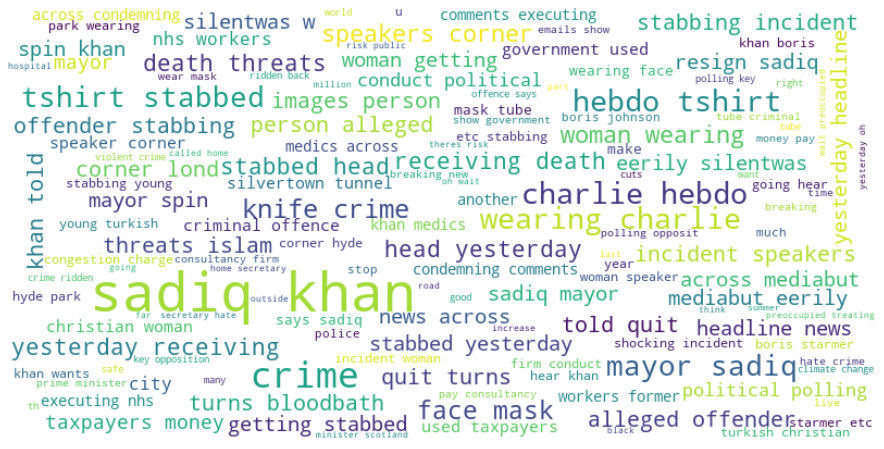


 ----------- ALL WORDS - AGAINST ---------- 



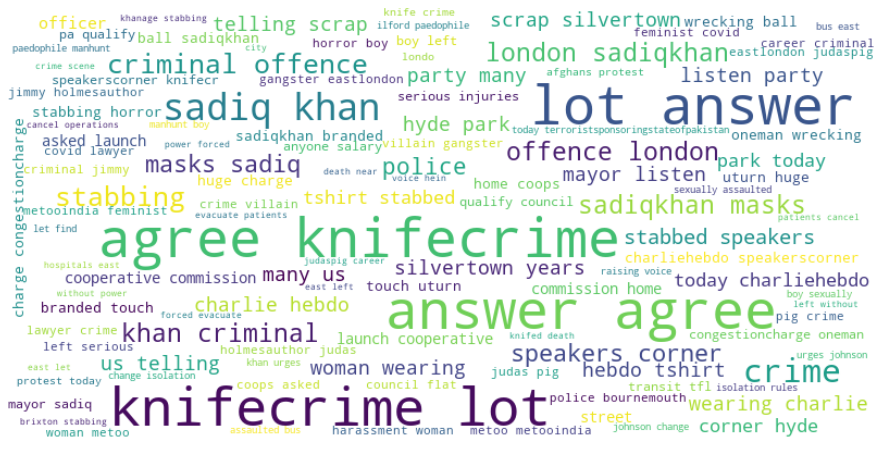

Number of words, FOR = 1802
Number of words, AGAINST = 1205


In [10]:
all_clean_words_for = " ".join(ttext for ttext in pruned_tweets[pruned_tweets.target==0]['Clean_MessageText']) # code taken from VA_Lab08 (Text)
all_clean_words_against = " ".join(ttext for ttext in pruned_tweets[pruned_tweets.target==1]['Clean_MessageText']) # code taken from VA_Lab08 (Text)

tw_nlp.plot_wordcloud(all_clean_words_for, 'ALL WORDS - FOR')
tw_nlp.plot_wordcloud(all_clean_words_against, 'ALL WORDS - AGAINST')

unique_for = tw_nlp.unique_words(all_clean_words_for)
unique_against = tw_nlp.unique_words(all_clean_words_against)

print("Number of words, FOR = " + str(len(unique_for))) # we have 462922 unique words
print("Number of words, AGAINST = " + str(len(unique_against))) 

In [11]:
tw_nlp.plot_ngrams(pruned_tweets[pruned_tweets.target==0], 'Clean_MessageText')

In [12]:
tw_nlp.plot_ngrams(pruned_tweets[pruned_tweets.target==1], 'Clean_MessageText')

## Comments
Tweets within the FOR and AGAINST classes use very similar words in the body of the text and this means the features we create from them (bag of words, count vectorizer) will be similar too. Which will impact the performance of our classifier. This problem arisesd because less than 6% of our tweets contain any hashtags at all and less than 2.5% contained hashtags that we used to classify tweets.

Before progressing, it's worth double checking the words used in the message text of tweets which we'd originally classified as supporting the Mayor. This could help us understand whether our problem arises from having to randomly select tweets


 ----------- ALL WORDS - FOR, from hashtags ---------- 



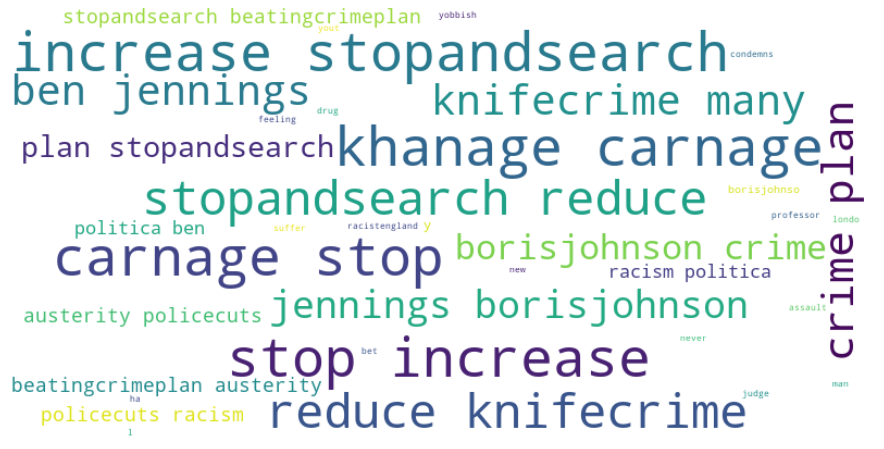

Number of words, FOR, from hashtags = 79


In [13]:
all_clean_words_for_hash = " ".join(ttext for ttext in all_tweets[all_tweets.label == 'FOR']['Clean_MessageText']) # code taken from VA_Lab08 (Text)

tw_nlp.plot_wordcloud(all_clean_words_for_hash, 'ALL WORDS - FOR, from hashtags')

unique_for_hash = tw_nlp.unique_words(all_clean_words_for_hash)

print("Number of words, FOR, from hashtags = " + str(len(unique_for_hash)))

In [14]:
tw_nlp.plot_ngrams(all_tweets[all_tweets.label == 'FOR'], 'Clean_MessageText')

We can see a difference in the words used in those classified as FOR tweets based on the hashtags. This suggests we could have had more success if we'd identified a greater number of tweets using hashtags which openly supported the Mayors position. This means that we confirm Bovet's original conclusion that for his classification process to work we need 'a large usage of opinion-hashtags and a polarization of opinion resulting in well seperated hashtag clusters'.

However, we want to complete the exercise to review the performance of our classifier to confirm this hypothesis. The first step is to create the features we will use to train the classification model.

Bovet used both hashtags (having first removed the cooccurring hashtags) and words within the tweet message text to generate features but we know that many most of our FOR tweets will not contain hashtags and so using them for the AGAINST tweets will bias our dataset. We will therefore purely concentrate on message body text.

### Create features ----> blah blah
Bovet used hashtags, we know a large number of our tweets don't contain them so just vectorize on the message text
- use vectoriser, bag of words, ngrams
- see how we get on in terms of accuracy

- then group tweets by tweeter id and class and use majority class to set opinion of tweeter
- see how many tweeters out of total we classify and therefore how many tweets out of 24,772

- compare this with what we got from community detection algorithms


### Bovet notebooks
https://github.com/alexbovet/network_lesson/blob/master/04_Twitter_Sentiment_Analysis.ipynb
https://github.com/alexbovet/network_lesson/blob/master/TwSentiment.py
https://github.com/alexbovet/network_lesson/blob/master/train_sentiment_classifier.py

### Create vocabularies containing top 50 words and ngrams
These will be used to constrain the results of the countvectorizer to mark the presence or absence of only the top 50 items
- otherwise it creates entries for every single word in the document corpus

Using 50 of each I got the following performance
- prediction accuracy: 0.7801418439716312
- precision: 0.9339622641509434
- recall: 0.6428571428571429
- Area under the curve score: 0.7940848214285714

#### amendment - use top 100 ngrams and words
Using 100 of each I got the following performance
- prediction accuracy 0.8439716312056738
- precision 0.8928571428571429
- recall 0.8116883116883117
- Area under the curve score 0.8472504058441559

## Helper Functions
- 1. First create our document corpus, which will result in one document for each tweet's message text
- 2. Then create numeric matrices to represent the word and ngram features - This code was inspired by user guide and examples https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import MachineLearning_functions as ml_performance

from enum import Enum
   
# create our dictionary of words and ngrams
def get_words_ngrams(message_text, n):
    
    common_words = tw_nlp.get_top_n_words(message_text, n)
    common_ngrams = tw_nlp.get_top_k_n_gram(message_text, n,2)

    words_vocab = [word_tup[0] for word_tup in common_words]
    ngrams_vocab = [bigram_tup[0] for bigram_tup in common_ngrams]
    
    return words_vocab, ngrams_vocab

def get_word_features(words_vocab, corpus):

    vectorizer = CountVectorizer(vocabulary=words_vocab)
    X = vectorizer.fit_transform(corpus)
    print("shape of words array = {}".format(X.shape))
    
    column_names_words = vectorizer.get_feature_names()
    words_array = X.toarray()
    
    df_individual_words = pd.DataFrame(data=words_array, columns=column_names_words)
    
    return df_individual_words

def get_bigram_features(ngrams_vocab, corpus):

    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), vocabulary=ngrams_vocab)
    X = vectorizer.fit_transform(corpus)
    print("shape of bigrams array = {}".format(X.shape))

    column_names = vectorizer.get_feature_names()
    bigram_array = X.toarray()
    
    df_ngrams = pd.DataFrame(data=bigram_array, columns=column_names)
    
    return df_ngrams

features_mode = Enum('features_mode', 'DEFAULT WORDS BIGRAMS')

def get_features_and_labels(tweets, df_individual_words, df_ngrams, myMode=features_mode.DEFAULT, printFile='N'):
    
    # first create the labels - I also include Tweet_lemmatised field so I can 
    # manually sense check my created dataset in excel if I choose to print the file
    
    labels = tweets[['target', 'Tweet_lemmatized']]
    df_labels = pd.DataFrame(data=labels, columns=['target', 'Tweet_lemmatized'])
    
    if myMode == features_mode.DEFAULT:
        # default is to combine words and bigrams
        print("<------- features created from both WORDS and BIGRAMS ------>")
        df_all_data = df_ngrams.join(df_labels)
        df_all_data = df_all_data.join(df_individual_words)
        
    else:
        if myMode == features_mode.WORDS:
            # words only
            print("<------- features created from WORDS only ---------->")
            df_all_data = df_individual_words.join(df_labels)
        else:
            # bigrams only
            print("<------- features created from BIGRAMS only ---------->")
            df_all_data = df_ngrams.join(df_labels)

    print("shape of df_all_data = {}".format(df_all_data.shape))
    print("\n <----- First 5 rows of df_all_data ----->")
    display(df_all_data.head())
    
    if printFile=='Y':
        df_all_data.to_csv('twitter_features.csv', index=False)
        
    labels = np.array(df_all_data['target'])
    df_all_data = df_all_data.drop(['target', 'Tweet_lemmatized'], axis = 1)
    features = np.array(df_all_data)

    print("shape of labels = {}".format(labels.shape))
    print("shape of features = {}".format(features.shape))
        
    return features, labels

def train_and_test_classifier(features, labels):
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    
    rf = RandomForestClassifier(n_estimators = 500, oob_score = True,
                           bootstrap = True, random_state = 42)

    # Train the model on training data
    rf.fit(train_features, train_labels);
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)
    accuracy, precision, recall, roc_auc, tn, fp, fn, tp = ml_performance.RF_performance_reporting(rf, test_features, test_labels, 
                                                                                predictions, 'normal', print_output=True)
    
    return accuracy, precision, recall, roc_auc, tn, fp, fn, tp
    

def run_scenario(description, tweets, corpus, n, myMode=features_mode.WORDS, printFile='N'):
    
    words_vocab, ngrams_vocab = get_words_ngrams(tweets.Clean_MessageText, n)
    df_individual_words = get_word_features(words_vocab, corpus)
    df_ngrams = get_bigram_features(ngrams_vocab, corpus)

    print("<-------------- common words ------------------>")
    display(df_individual_words.head())
    print("<-------------- common bigrams ------------------>")
    display(df_ngrams.head())
    
    # features_modes: if both, then DEFAULT, if just words then WORDS, if just bigrams then BIGRAMS
    features, labels = get_features_and_labels(tweets, df_individual_words, df_ngrams, 
                                           myMode, printFile)
    
    accuracy, precision, recall, roc_auc, tn, fp, fn, tp = train_and_test_classifier(features, labels)
    
    rf_result_row = {'description': description, 
                 'accuracy': accuracy, 
                 'precision': precision,
                 'recall': recall,
                 'auc': roc_auc, 
                 'true positive': tp, 
                 'false positive': fp, 
                 'true negative': tn, 
                 'false negative': fn}
    
    return rf_result_row

### create the corpus, which is a list of 'documents', where 1 document = 1 tweets message text 

In [16]:
corpus =[]
  
# Iterate over each row
for row in pruned_tweets.itertuples():
    
    # append the list to the final list
    corpus.append(row.Clean_MessageText)
  
# Print the corpus
print("The document corpus has length: {}".format(len(corpus)))
print("<----------------- corpus -------------->")
display(corpus[:10])

print("\n<--------- original tweets ------------->")
# display original DF so we can confirm they are the same
display(pruned_tweets.Clean_MessageText.head(10))

The document corpus has length: 1128
<----------------- corpus -------------->


['seriously injured stabbing teen girl woman charged police crime hortonandwellington knife…',
 '’ six years ’ sadiq khan lambasted knife crime surge sadiq khan grilled calle…',
 '’ six years ’ lambasted knife crime surge khanage continues w…',
 'knifecrime fallen low total five years',
 'knifecrime fallen low total five years',
 '’ six years ’ lambasted knife crime surge khanage continues und…',
 'crime city hit night violence leaving dead hospital hit three shocking k…',
 'knifecrime ‘ perfect storm ’ ’ capital dangerous ever violent teenage deaths fell…',
 'get job sadiqkhan savaged tory mp failing keep safe',
 'get job sadiqkhan savaged tory mp failing keep safe']


<--------- original tweets ------------->


0    seriously injured stabbing teen girl woman cha...
1    ’ six years ’ sadiq khan lambasted knife crime...
2    ’ six years ’ lambasted knife crime surge khan...
3               knifecrime fallen low total five years
4               knifecrime fallen low total five years
5    ’ six years ’ lambasted knife crime surge khan...
6    crime city hit night violence leaving dead hos...
7    knifecrime ‘ perfect storm ’ ’ capital dangero...
8    get job sadiqkhan savaged tory mp failing keep...
9    get job sadiqkhan savaged tory mp failing keep...
Name: Clean_MessageText, dtype: object

### Now create and run our classifier under different scenarios

In [17]:
rf_results_df = pd.DataFrame(columns=['description', 
                                      'accuracy', 
                                      'precision', 
                                      'recall', 
                                      'auc', 
                                      'true positive',
                                      'false positive',
                                      'true negative',
                                      'false negative'])

shape of words array = (1128, 50)
shape of bigrams array = (1128, 50)
<-------------- common words ------------------>


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,says,left,tube,hyde,party,told,islam,tfl,charge,boris,resign,covid,home,receiving,city
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,person alleged,alleged offender,offender stabbing,stabbing incident,incident speakers,corner lond,woman getting,getting stabbed,stabbed yesterday,yesterday headline,headline news,news mediabut,mediabut eerily,eerily silentwas,taxpayers money
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1128, 102)

 <----- First 5 rows of df_all_data ----->


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,says,left,tube,hyde,party,told,islam,tfl,charge,boris,resign,covid,home,receiving,city
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1128,)
shape of features = (1128, 100)
Training Features Shape: (846, 100)
Training Labels Shape: (846,)
Testing Features Shape: (282, 100)
Testing Labels Shape: (282,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.8191489361702128
precision 0.905511811023622
recall 0.7467532467532467
Area under the curve score 0.8265016233766234




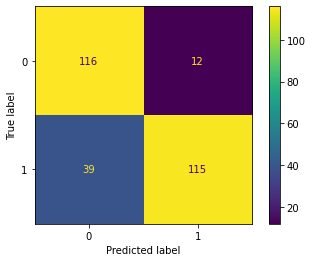

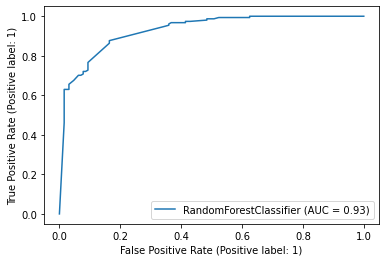

shape of words array = (1128, 50)
shape of bigrams array = (1128, 50)
<-------------- common words ------------------>


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,says,left,tube,hyde,party,told,islam,tfl,charge,boris,resign,covid,home,receiving,city
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,person alleged,alleged offender,offender stabbing,stabbing incident,incident speakers,corner lond,woman getting,getting stabbed,stabbed yesterday,yesterday headline,headline news,news mediabut,mediabut eerily,eerily silentwas,taxpayers money
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from WORDS only ---------->
shape of df_all_data = (1128, 52)

 <----- First 5 rows of df_all_data ----->


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,tube,hyde,party,told,islam,tfl,charge,boris,resign,covid,home,receiving,city,target,Tweet_lemmatized
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1128,)
shape of features = (1128, 50)
Training Features Shape: (846, 50)
Training Labels Shape: (846,)
Testing Features Shape: (282, 50)
Testing Labels Shape: (282,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.8191489361702128
precision 0.905511811023622
recall 0.7467532467532467
Area under the curve score 0.8265016233766234




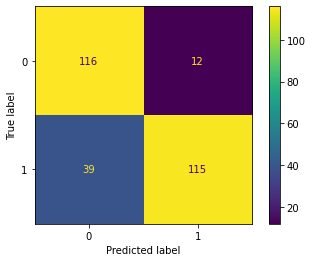

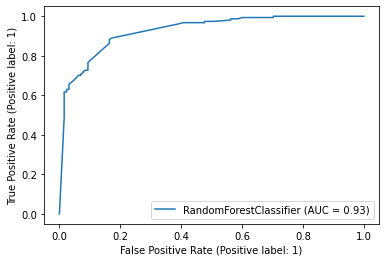

shape of words array = (1128, 50)
shape of bigrams array = (1128, 50)
<-------------- common words ------------------>


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,says,left,tube,hyde,party,told,islam,tfl,charge,boris,resign,covid,home,receiving,city
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,person alleged,alleged offender,offender stabbing,stabbing incident,incident speakers,corner lond,woman getting,getting stabbed,stabbed yesterday,yesterday headline,headline news,news mediabut,mediabut eerily,eerily silentwas,taxpayers money
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from BIGRAMS only ---------->
shape of df_all_data = (1128, 52)

 <----- First 5 rows of df_all_data ----->


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,offender stabbing,stabbing incident,incident speakers,corner lond,woman getting,getting stabbed,stabbed yesterday,yesterday headline,headline news,news mediabut,mediabut eerily,eerily silentwas,taxpayers money,target,Tweet_lemmatized
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1128,)
shape of features = (1128, 50)
Training Features Shape: (846, 50)
Training Labels Shape: (846,)
Testing Features Shape: (282, 50)
Testing Labels Shape: (282,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.74822695035461
precision 0.6966824644549763
recall 0.9545454545454546
Area under the curve score 0.7272727272727273




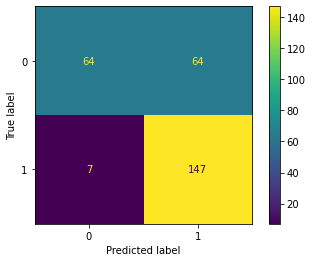

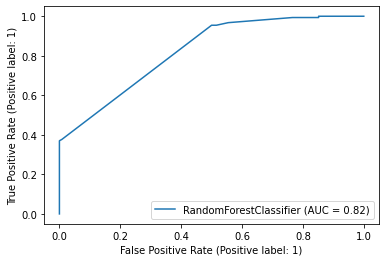

shape of words array = (1128, 100)
shape of bigrams array = (1128, 100)
<-------------- common words ------------------>


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,speakerscorner,londoners,workers,wants,nhs,going,stop,daylight,climate,station,rules,people,used,conduct,political
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,wrecking ball,ball sadiqkhan,sadiqkhan branded,branded touch,touch uturn,uturn huge,huge charge,charge congestioncharge,home coops,khan urges,change isolation,isolation rules,horror boy,tube criminal,speakerscorner knifecr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1128, 202)

 <----- First 5 rows of df_all_data ----->


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,speakerscorner,londoners,workers,wants,nhs,going,stop,daylight,climate,station,rules,people,used,conduct,political
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1128,)
shape of features = (1128, 200)
Training Features Shape: (846, 200)
Training Labels Shape: (846,)
Testing Features Shape: (282, 200)
Testing Labels Shape: (282,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.8191489361702128
precision 0.8814814814814815
recall 0.7727272727272727
Area under the curve score 0.8238636363636364




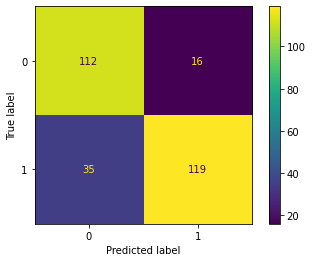

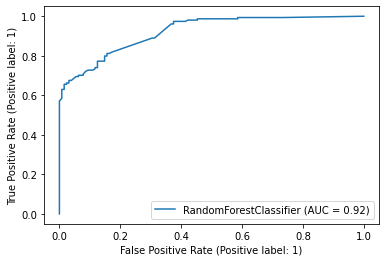

shape of words array = (1128, 100)
shape of bigrams array = (1128, 100)
<-------------- common words ------------------>


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,speakerscorner,londoners,workers,wants,nhs,going,stop,daylight,climate,station,rules,people,used,conduct,political
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,wrecking ball,ball sadiqkhan,sadiqkhan branded,branded touch,touch uturn,uturn huge,huge charge,charge congestioncharge,home coops,khan urges,change isolation,isolation rules,horror boy,tube criminal,speakerscorner knifecr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from WORDS only ---------->
shape of df_all_data = (1128, 102)

 <----- First 5 rows of df_all_data ----->


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,workers,wants,nhs,going,stop,daylight,climate,station,rules,people,used,conduct,political,target,Tweet_lemmatized
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1128,)
shape of features = (1128, 100)
Training Features Shape: (846, 100)
Training Labels Shape: (846,)
Testing Features Shape: (282, 100)
Testing Labels Shape: (282,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.8014184397163121
precision 0.855072463768116
recall 0.7662337662337663
Area under the curve score 0.8049918831168832




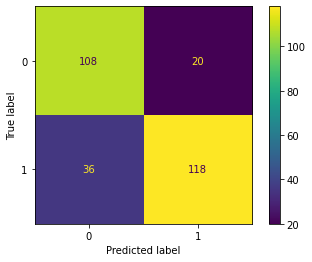

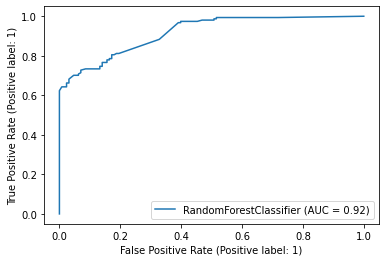

shape of words array = (1128, 100)
shape of bigrams array = (1128, 100)
<-------------- common words ------------------>


,khan,sadiq,crime,knifecrime,lot,agree,answer,mayor,woman,stabbed,stabbing,police,wearing,corner,criminal,...,speakerscorner,londoners,workers,wants,nhs,going,stop,daylight,climate,station,rules,people,used,conduct,political
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,wrecking ball,ball sadiqkhan,sadiqkhan branded,branded touch,touch uturn,uturn huge,huge charge,charge congestioncharge,home coops,khan urges,change isolation,isolation rules,horror boy,tube criminal,speakerscorner knifecr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from BIGRAMS only ---------->
shape of df_all_data = (1128, 102)

 <----- First 5 rows of df_all_data ----->


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,sadiqkhan branded,branded touch,touch uturn,uturn huge,huge charge,charge congestioncharge,home coops,khan urges,change isolation,isolation rules,horror boy,tube criminal,speakerscorner knifecr,target,Tweet_lemmatized
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1128,)
shape of features = (1128, 100)
Training Features Shape: (846, 100)
Training Labels Shape: (846,)
Testing Features Shape: (282, 100)
Testing Labels Shape: (282,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.6985815602836879
precision 0.9259259259259259
recall 0.487012987012987
Area under the curve score 0.7200689935064934




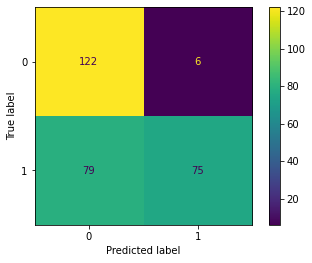

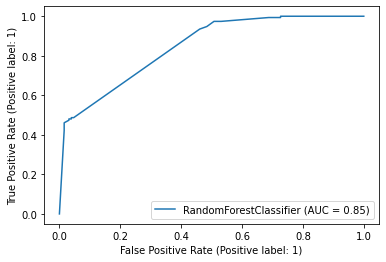

In [18]:
n=50 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words and Bigrams, Vocab Count: 50'
rf_result_row = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.WORDS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words only, Vocab Count: 50'
rf_result_row = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.BIGRAMS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Bigrams only, Vocab Count: 50'
rf_result_row = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

n=100 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words and Bigrams, Vocab Count: 100'
rf_result_row = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.WORDS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words only, Vocab Count: 100'
rf_result_row = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.BIGRAMS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Bigrams only, Vocab Count: 100'
rf_result_row = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

In [19]:
rf_results_df.sort_values(by='auc', ascending=False)

,description,accuracy,precision,recall,auc,true positive,false positive,true negative,false negative
0,"Features: Words and Bigrams, Vocab Count: 50",0.819149,0.905512,0.746753,0.826502,115,12,116,39
1,"Features: Words only, Vocab Count: 50",0.819149,0.905512,0.746753,0.826502,115,12,116,39
3,"Features: Words and Bigrams, Vocab Count: 100",0.819149,0.881481,0.772727,0.823864,119,16,112,35
4,"Features: Words only, Vocab Count: 100",0.801418,0.855072,0.766234,0.804992,118,20,108,36
2,"Features: Bigrams only, Vocab Count: 50",0.748227,0.696682,0.954545,0.727273,147,64,64,7
5,"Features: Bigrams only, Vocab Count: 100",0.698582,0.925926,0.487013,0.720069,75,6,122,79


### Comments
#### 12/08/2021
- the bigrams are being picked up correctly and the dataframe join worked fine but 710 of 1128 contained all zeros and this suggests top 50 bigrams is not granular enough to differentiate on its own, so we will now add individual words as well

### Comments

Best results when using both words and bigrams and also when using the top 100 (rather than 50) words/bigrams in their respective vocabularies.

I'm actually very surprised that we got such good results so lets go one step further and find optimal hyperparameters

My good results might be being driven by the good recall results - maybe words so string they clearly identify the against camp and such good results for against camp are also boosting overall precision results.


In [20]:
n=100 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # WORDS and BIGRAMS

words_vocab, ngrams_vocab = get_words_ngrams(pruned_tweets.Clean_MessageText, n)
df_individual_words = get_word_features(words_vocab, corpus)
df_ngrams = get_bigram_features(ngrams_vocab, corpus)

# features_modes: if both, then DEFAULT, if just words then WORDS, if just bigrams then BIGRAMS
features, labels = get_features_and_labels(pruned_tweets, df_individual_words, df_ngrams, 
                                           myMode, printFile='N')

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

shape of words array = (1128, 100)
shape of bigrams array = (1128, 100)
<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1128, 202)

 <----- First 5 rows of df_all_data ----->


,sadiq khan,lot answer,answer agree,agree knifecrime,charlie hebdo,wearing charlie,hebdo tshirt,tshirt stabbed,speakers corner,criminal offence,mayor sadiq,woman wearing,knife crime,khan criminal,offence london,...,speakerscorner,londoners,workers,wants,nhs,going,stop,daylight,climate,station,rules,people,used,conduct,political
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1128,)
shape of features = (1128, 200)


In [21]:
import time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 5],
    'max_features': [3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
gs_rf = GridSearchCV(estimator = rf, param_grid = param_grid, refit=True,
                          cv = 5, n_jobs = -1, verbose = 2)

tic = time.perf_counter()
gs_rf.fit(train_features, train_labels)
toc = time.perf_counter()

print(f"Running the Random Forest classifer on our best features dataset took {toc - tic:0.4f} seconds")

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 3, 5],
                         'max_features': [3, 4], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

Running the Random Forest classifer on our best features dataset took 70.1304 seconds


------------------------------------------------------------------
Printing performance metrics for optimal model
------------------------------------------------------------------

prediction accuracy 0.7127659574468085
precision 1.0
recall 0.474025974025974
Area under the curve score 0.737012987012987




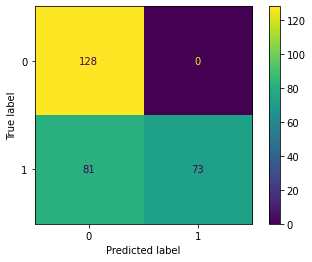

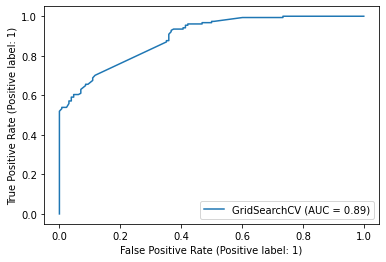

In [22]:
y_pred = gs_rf.predict(test_features)

accuracy, precision, recall, roc_auc, tn, fp, fn, tp = ml_performance.RF_performance_reporting(gs_rf, 
                                                                                test_features, 
                                                                                test_labels, 
                                                                                y_pred, 
                                                                                'optimal model', 
                                                                                print_output=True)

### Comments
The cross validated results are worse than basic results -> 
are cross validated results being biased because small dataset (see if any  research)

## We now want to extrapolate to see whether we can label tweeters from the majority of their tweets

In [23]:
all_unique_users = all_tweets.tweeter_screen_name.nunique()
pruned_unique_users = pruned_tweets.tweeter_screen_name.nunique()

print("Percentage of all tweeters in our pruned dataset = {:.2%}".format(pruned_unique_users / all_unique_users))

Percentage of all tweeters in our pruned dataset = 6.22%


## Appendix A - Test the function that assigns class (get_tweet_class)

In [24]:
test_hashtags = ['[]', '[]', '[#a, #b, #c, #d]', '[#a, #b]', '[#x, #y, #z]', '[#a, #x]', '[#a, #b, #x]', '[#a, #x, #y]']
test_hashtags_df = pd.DataFrame(test_hashtags, columns =['hashtags'])

test_for_hashtags = ['#a', '#b', '#c']
test_against_hashtags = ['#x', '#y']

test_set_for = set(test_for_hashtags)
test_set_against = set(test_against_hashtags)

test_hashtags_df['label'] = '' 
test_hashtags_df['label'] = test_hashtags_df['hashtags'].apply(lambda x: get_tweet_class(x, test_set_for, test_set_against))

test_hashtags_df

,hashtags,label
0,[],NONE
1,[],NONE
2,"[#a, #b, #c, #d]",FOR
3,"[#a, #b]",FOR
4,"[#x, #y, #z]",AGAINST
5,"[#a, #x]",FOR
6,"[#a, #b, #x]",FOR
7,"[#a, #x, #y]",AGAINST


### Comments
The results are as expected so happy with the function